In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [2]:
# Read the dataset
data = pd.read_csv("IMDB_Dataset.csv")

In [3]:
# Encode sentiments (positive -> 1, negative -> 0)
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)
data.head()

/var/folders/dh/4lm_4b3s3z39vzsdwm_8r9rw0000gn/T/ipykernel_7571/3613088790.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['sentiment'], test_size=0.2, random_state=42)


In [6]:
# Text vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [7]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)

LogisticRegression()

In [8]:
# Predictions
y_pred = logreg.predict(X_test_tfidf)

In [9]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.895

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [10]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

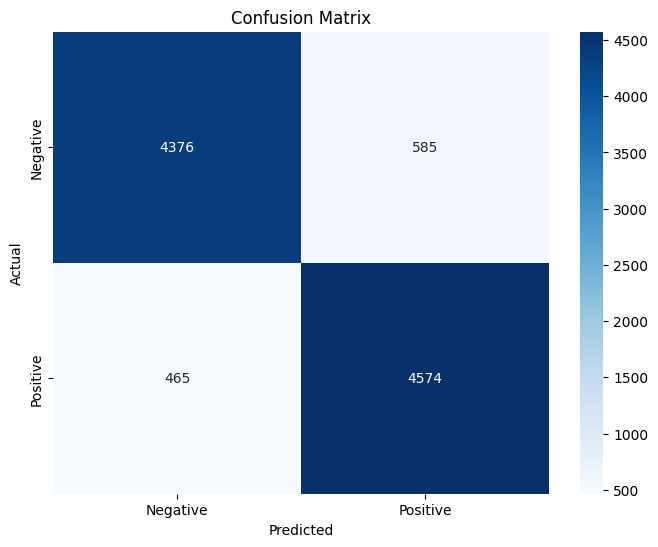

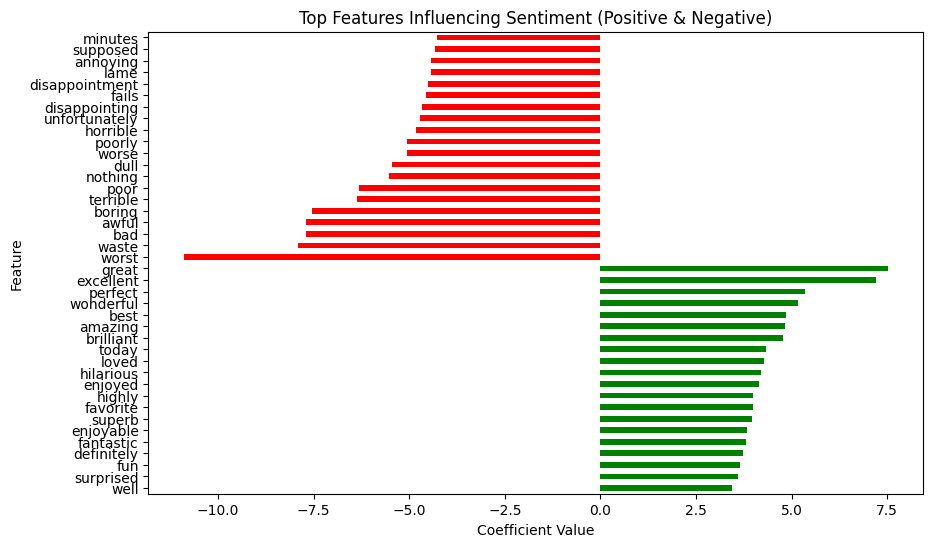

In [11]:
# Plotting the confusion matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot feature importance
def plot_feature_importance(vectorizer, model, n=20):
    feature_names = vectorizer.get_feature_names_out()
    sorted_indices = model.coef_[0].argsort()
    top_positive = sorted_indices[-n:]
    top_negative = sorted_indices[:n]
    
    top_features = pd.DataFrame({
        "Feature": feature_names[top_positive].tolist() + feature_names[top_negative].tolist(),
        "Coefficient": model.coef_[0][top_positive].tolist() + model.coef_[0][top_negative].tolist()
    })
    
    plt.figure(figsize=(10, 6))
    top_features.set_index("Feature")["Coefficient"].plot(kind="barh", color=["green" if x > 0 else "red" for x in top_features["Coefficient"]])
    plt.title("Top Features Influencing Sentiment (Positive & Negative)")
    plt.xlabel("Coefficient Value")
    plt.show()

# Plotting
plot_confusion_matrix(conf_matrix)
plot_feature_importance(tfidf, logreg)